In [1]:
#%matplotlib inline
%matplotlib widget
from ipyleaflet import *
import ipywidgets as widgets
from ipywidgets import HTML, Layout, IntSlider, RadioButtons, Dropdown, Button, Output, Label
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import random
import json
import netCDF4 as nc

# from deb.simulations import simulate_deb, plot_res, aux, fArr

In [2]:
# Variable setup
x, y = 0, 0
dummy_num = 0
with open('data/MED_farms_for_display_markers.geojson', 'r') as f:
    data = json.load(f)
name = None
temp_marker = Marker(location=[-90, 0])

In [3]:
# Map setup
defaultLayout=Layout(width='1200px', height='500px')
center=(40,20)
icon = Icon(icon_url='', icon_size=[38, 95])
m = Map(center=center,
       basemap=basemaps.Esri.WorldImagery,
        zoom=4,
       layout=defaultLayout)

# m.add_layer(temp_marker)

label = Label(layout=Layout(width="100%"))

def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        global x
        global y
        global dummy_num
        global feature_clicked
        global temp_marker
        try:
            m.remove_layer(temp_marker)
        except:
            pass
        temp_marker = Marker(
                location=kwargs.get('coordinates'),
                icon=icon,
                name="Location info")           
        #print("You clicked on: ", kwargs.get('coordinates'))
               
        x, y = kwargs.get('coordinates')
        dummy_num += 1
        message1 = HTML()
        message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Number: {dummy_num}"
        label.value = "No aquaculture selected"
        popup = Popup(
            location=(x, y),
            child=message1,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
        m.add_layer(popup)
        m.add_layer(temp_marker)
        feature_clicked=False
        
m.on_interaction(handle_click)

def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


geo_json = GeoJSON(
    data=data,
    style = {
        "opacity": 100},
    name="Farm locations"
)

def click_handler(event=None, feature=None, id=None, properties=None):
    global name
    global feature_clicked
    global dummy_num
    feature_clicked=True
    dummy_num += 1
    try:
        m.remove_layer(temp_marker)
    except:
        pass
    #name = properties["geounit"]
    name = properties["species"]
    if name == None:
        name = properties["species 1"]
    x = properties["coordinates"][1]
    y = properties["coordinates"][0]
    label.value = f"Species: {name}"
    message1 = HTML()
    message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br>  Species: {name[name.find('(')+1:name.find(')')]} <br> Number: {dummy_num}"
    popup = Popup(
            location=(x, y),
            child=message1,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
    m.add_layer(popup)

geo_json.on_click(click_handler)

m.add_layer(geo_json)

control = LayersControl(position='topright')
m.add_control(control)


Map(center=[40, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

Label(value='', layout=Layout(width='100%'))

Dropdown(description='Species selector:', options=('Argyrosomus_regius', 'Dentex_dentex', 'Dicentrarchus_labra…

RadioButtons(description='Scenario:', options=('scenario 1', 'scenario 2', 'scenario 3'), value='scenario 1')

Button(description='Simulate!', style=ButtonStyle())

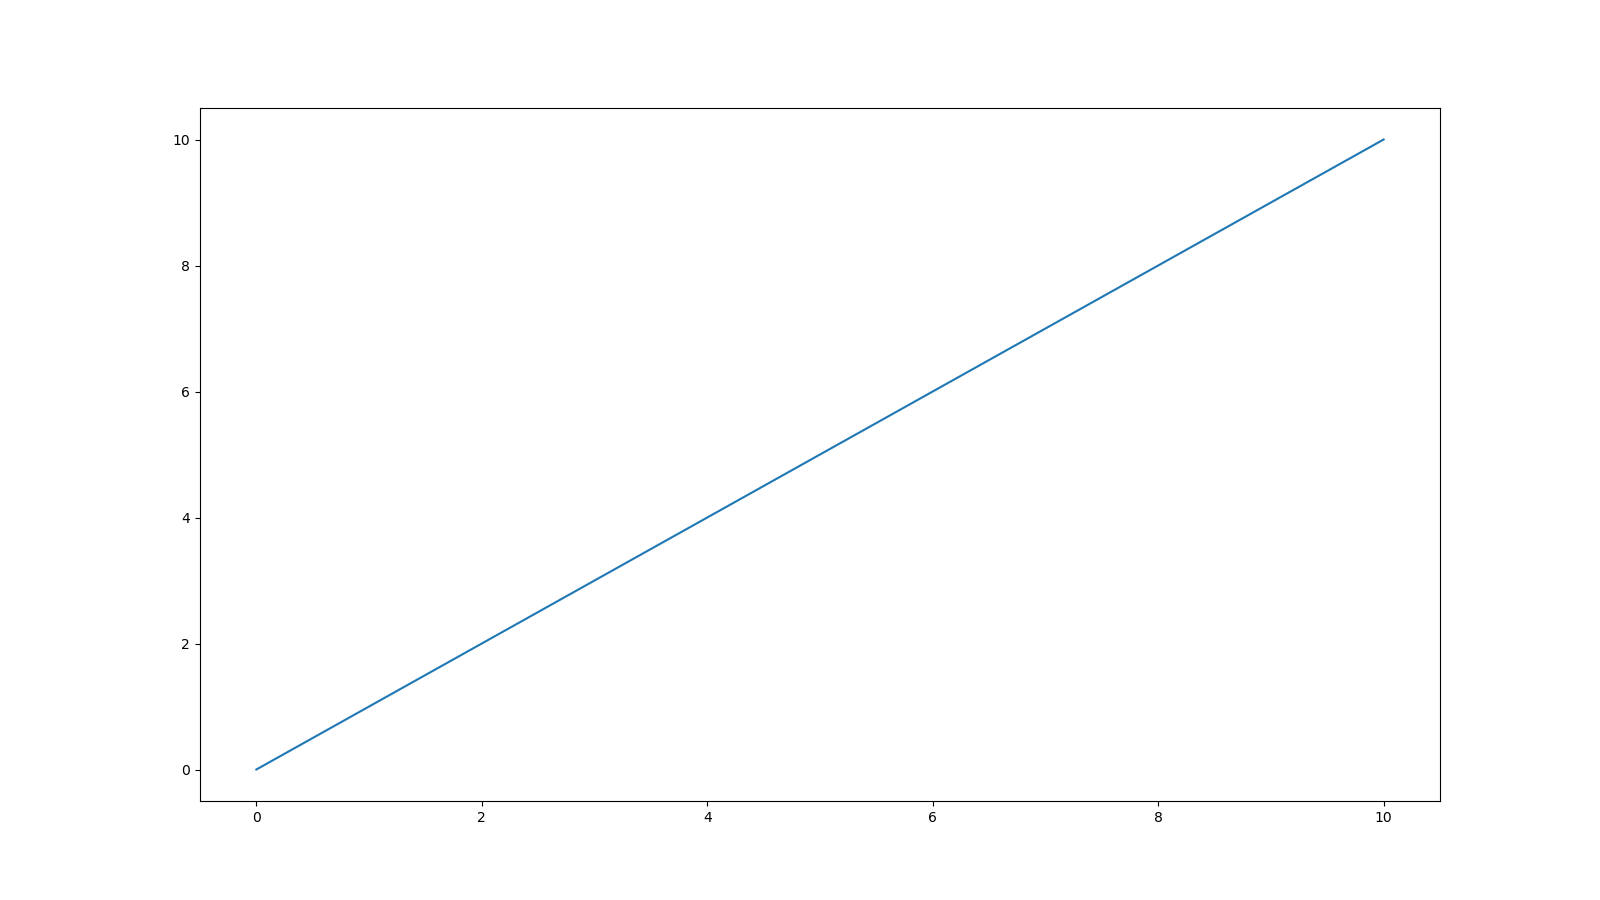

In [4]:
display(m)
# Print results
display(label)

options = [
    'Argyrosomus_regius',
    'Dentex_dentex',
    'Dicentrarchus_labrax',
    'Diplodus_puntazzo',
    'Diplodus_sargus',
    'Diplodus_vulgaris',
    'Lithognathus_mormyrus',
    'Oncorhynchus_mykiss',
    'Pagellus_erythrinus',
    'Salmo_salar',
    'Sarpa_salpa',
    'Sciaena_umbra',
    'Seriola_dumerili',
    'Sparus_aurata',
    'Thunnus_thynnus']
scenarios = ["scenario 1", "scenario 2", "scenario 3"]

dropdown = Dropdown(
    options=options,
    value = options[0],
    description = "Species selector:",
    disabled = False
)

radios = RadioButtons(
    options=scenarios,
    description="Scenario:",
    disabled=False
)

display(dropdown)
display(radios)

btn = Button(description="Simulate!")
out = Output()


fig, ax = plt.subplots(figsize=(16, 9))
line, = ax.plot(np.linspace(0,10), np.linspace(0,10))
title = ax.set_title("")

def update(change):
    line.set_ydata(np.random.randint(0, 10, 50))
    ax.set_title(f"{dropdown.value}-{scenarios.value}")
    fig.canvas.draw()
    return

#radios.observe(update, "value")

btn.on_click(update)

display(btn)
